<a href="https://colab.research.google.com/github/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/blob/main/Visualization_team_blancpain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DMML TEAM BLANCPAIN



In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##Data Importation and visualization##

In [136]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/training_data.csv')

df_test = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/test_data.csv')

df_sample = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/sample_submission.csv')

In [137]:
df_train.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [124]:
print("There are {0} rows and {1} columns in the train dataset.".format(df_train.shape[0],df_train.shape[1]))


There are 6471 rows and 5 columns in the train dataset.


In [125]:
df_test.head(10)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
5,10020,twister,NaN,Brain twister let drop up telly structuring ca...
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
7,3131,debris,NaN,Aircraft debris found on island is from MH370 ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...


In [126]:
print("There are {0} rows and {1} columns in the test dataset.".format(df_test.shape[0],df_test.shape[1]))


There are 1142 rows and 4 columns in the test dataset.


In [127]:
df_sample.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
print("There are {0} rows and {1} columns in the dataset.".format(df_sample.shape[0],df_sample.shape[1]))

There are 1142 rows and 1 columns in the dataset.


### Missing values:

In [128]:
missing_train = df_train.isnull().sum(axis = 0)
print(missing_train)
#missing_train.plot.bar(x='lab', y='val', rot=0, color='plum', title='Missing Values in Train set')

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64


In [129]:
missing_test = df_test.isnull().sum(axis = 0)
print(missing_test)
#missing_test.plot.bar(x='lab', y='val', rot=0, color='lightblue', title='Missing Values in Test set')

id            0
keyword       6
location    392
text          0
dtype: int64


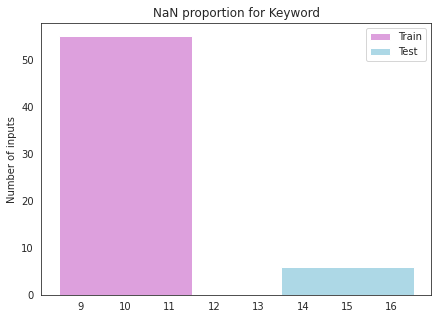

In [130]:
missing_keywords_train = df_train.keyword.isnull().sum(axis = 0)
missing_keywords_test = df_test.keyword.isnull().sum(axis = 0)

#plot NaN proportion for Keyword
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,missing_keywords_train,3, label="Train", color='plum')
plt.bar(15,missing_keywords_test,3, label="Test", color='lightblue')
plt.legend()
plt.ylabel('Number of inputs')
plt.title('NaN proportion for Keyword')
plt.show()




###Check the distribution: 

In [8]:
real_disaster = df_train[df_train['target'] == 1].shape[0]
not_disaster = df_train[df_train['target'] == 0].shape[0]

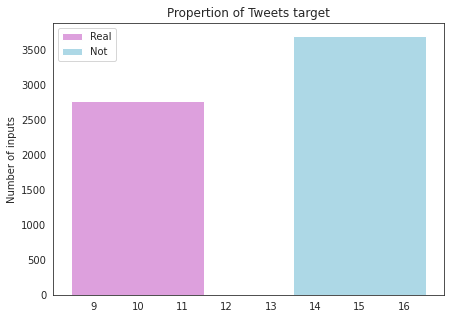

In [46]:
#Plot the result
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,real_disaster,3, label="Real", color='plum')
plt.bar(15,not_disaster,3, label="Not", color='lightblue')
plt.legend()
plt.ylabel('Number of inputs')
plt.title('Propertion of Tweets target')
plt.show()

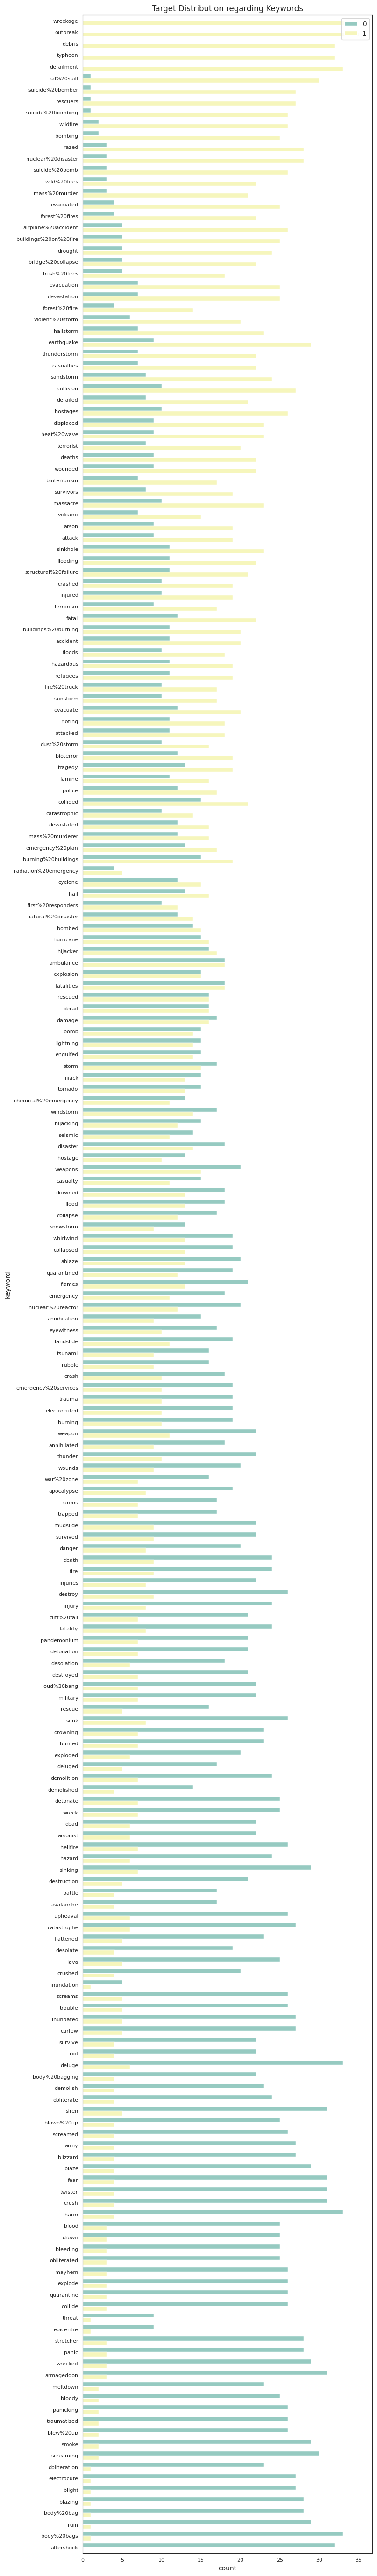

In [40]:
df_train['targetM'] = df_train.groupby('keyword')['target'].transform('mean')

figKey = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='targetM', ascending=False)['keyword'],
              hue=df_train.sort_values(by='targetM', ascending=False)['target'],palette="Set3")

plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.legend(loc=1)
plt.title('Target Distribution regarding Keywords')

plt.show()

df_train.drop(columns=['targetM'], inplace=True)

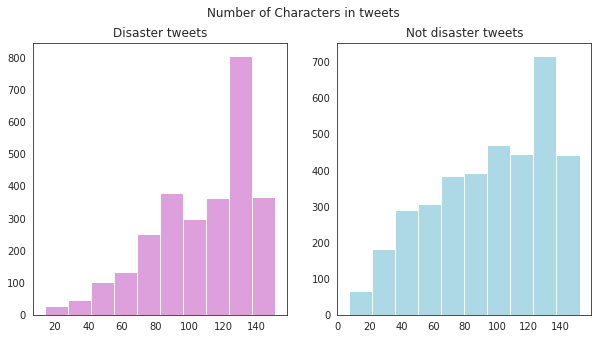

In [47]:
#number of characters in a Tweet 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

tweet_real = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweet_real,color='plum')
ax1.set_title('Disaster tweets')

tweet_not = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweet_not,color='lightblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Number of Characters in tweets')
plt.show()

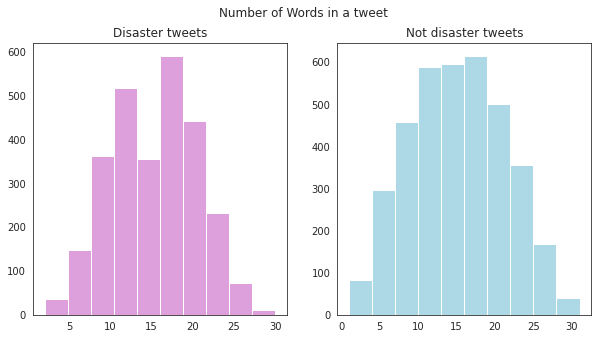

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_real = df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_real,color='plum')
ax1.set_title('Disaster tweets')

tweet_not = df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_not,color='lightblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Number of Words in a tweet')

plt.show()